In [ ]:
!pip install torchnet

In [ ]:
import BigProtonet
import Protonet
import Data
import Train
import Encoders
import Visualization
import torch

In [ ]:
import json
f = open('hyperparams.json')
hyperparams = json.load(f)

# Mini ImageNET

In [ ]:
###################################
## Link to MiniImageNet Data
## https://drive.google.com/drive/folders/1d4m5erMVAxU3YdSrU5khyYbVZntNYh7G?usp=sharing
## Create a copy in your google drive and change the path.
###################################

from google.colab import drive
drive.mount('/content/drive')
path  = '/content/drive/MyDrive/AMAL/miniimagenet-fewshot'

Mounted at /content/drive


In [ ]:
splits = ['train', 'val', 'test']
res = Data.loadDataMiniIMageNet(path, splits, hyperparams)

train data class num:  64
train support data size:  torch.Size([20, 5, 3, 84, 84])
train query data size:  torch.Size([20, 15, 3, 84, 84])
train num of episode: 100
val data class num:  16
val support data size:  torch.Size([5, 5, 3, 84, 84])
val query data size:  torch.Size([5, 5, 3, 84, 84])
val num of episode: 100
test data class num:  20
test support data size:  torch.Size([5, 5, 3, 84, 84])
test query data size:  torch.Size([5, 5, 3, 84, 84])
test num of episode: 100


## ConvNet

### BigProtonet

Test with convnet encoder :

In [ ]:
hyperparams["encoder" ] = "convnet"

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelConv.pt', hyperparams)
Train.train(state, res['train'], res['val'], 100, dev, save_path, 20, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  41.878973693847655  Acc:  0.14980000302195548
Loss_v:  5.962814214229584  Acc_v:  0.3642666748166084
Best loss:  5.962814214229584  Patience count:  20


Epoch: 1
Loss:  18.38391092300415  Acc:  0.1472666698694229
Loss_v:  4.191056475639344  Acc_v:  0.3921333409845829
Best loss:  4.191056475639344  Patience count:  20


Epoch: 2
Loss:  17.161264925003053  Acc:  0.1500666696950793
Loss_v:  3.244597628116608  Acc_v:  0.40733334213495254
Best loss:  3.244597628116608  Patience count:  20


Epoch: 3
Loss:  17.104056520462038  Acc:  0.15933333687484263
Loss_v:  2.6782820785045622  Acc_v:  0.4318666765093803
Best loss:  2.6782820785045622  Patience count:  20


Epoch: 4
Loss:  18.19094270706177  Acc:  0.15910000417381526
Loss_v:  3.0464167749881743  Acc_v:  0.44386667788028716
Best loss:  2.6782820785045622  Patience count:  19


Epoch: 5
Loss:  16.37204236984253  Acc:  0.17826667003333568
Loss_v:  2.993314731121063  Acc_v:  0.45866667836904523
Best loss:  2.678282078504562

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

0.5762666818499566

### Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoConv.pt', hyperparams)
Train.train(state, res['train'], res['val'], 100, dev, save_path, 20, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  13.643322083950043  Acc:  0.13630000323057176
Loss_v:  1.536868096590042  Acc_v:  0.33999999083578586
Best loss:  1.536868096590042  Patience count:  20


Epoch: 1
Loss:  2.815717968940735  Acc:  0.15313333667814732
Loss_v:  1.4966963744163513  Acc_v:  0.3655999901145697
Best loss:  1.4966963744163513  Patience count:  20


Epoch: 2
Loss:  2.740984299182892  Acc:  0.17106667079031468
Loss_v:  1.4464628386497498  Acc_v:  0.3963999903202057
Best loss:  1.4464628386497498  Patience count:  20


Epoch: 3
Loss:  2.7004432916641234  Acc:  0.18123333692550658
Loss_v:  1.4321210491657257  Acc_v:  0.40439998880028727
Best loss:  1.4321210491657257  Patience count:  20


Epoch: 4
Loss:  2.671743221282959  Acc:  0.18850000403821468
Loss_v:  1.4189831387996674  Acc_v:  0.4011999897658825
Best loss:  1.4189831387996674  Patience count:  20


Epoch: 5
Loss:  2.644998927116394  Acc:  0.1971000050008297
Loss_v:  1.421728311777115  Acc_v:  0.40919998943805697
Best loss:  1.41898313879

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoConv.pt', hyperparams)
Train.train(state, res['train'], res['val'], 100, dev, save_path, 20, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  20.260997552871704  Acc:  0.17740000426769256
Loss_v:  2.712621890306473  Acc_v:  0.38426667541265486
Best loss:  2.712621890306473  Patience count:  20


Epoch: 1
Loss:  3.8896141505241393  Acc:  0.19470000490546227
Loss_v:  1.838046498298645  Acc_v:  0.3858666762709618
Best loss:  1.838046498298645  Patience count:  20


Epoch: 2
Loss:  3.0968043613433838  Acc:  0.21040000438690185
Loss_v:  1.6569185066223144  Acc_v:  0.4009333425760269
Best loss:  1.6569185066223144  Patience count:  20


Epoch: 3
Loss:  2.8225837540626526  Acc:  0.22510000571608543
Loss_v:  1.5773692691326142  Acc_v:  0.41893334209918975
Best loss:  1.5773692691326142  Patience count:  20


Epoch: 4
Loss:  2.6836012983322144  Acc:  0.23693333938717842
Loss_v:  1.5175905227661133  Acc_v:  0.42706667810678484
Best loss:  1.5175905227661133  Patience count:  20


Epoch: 5
Loss:  2.5992844104766846  Acc:  0.24743333891034125
Loss_v:  1.4736105334758758  Acc_v:  0.4312000119686127
Best loss:  1.4736105

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

0.5485333433747291

## Resnet18

### BigProtonet

Test with resnet18 encoder :

In [ ]:
hyperparams['bigProto'] = 1

In [ ]:
print(hyperparams['bigProto'])

1


In [ ]:
hyperparams["encoder" ] = "resnet18"

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelResnet18.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]



Epoch: 0
Loss:  30.59034005880356  Acc:  0.1308000023290515
Loss_v:  1.9523141169548035  Acc_v:  0.5611999869346619
Best loss:  1.9523141169548035  Patience count:  50


Epoch: 1
Loss:  8.518680701255798  Acc:  0.32970000848174097
Loss_v:  1.688216358423233  Acc_v:  0.6319999837875366
Best loss:  1.688216358423233  Patience count:  50


Epoch: 2
Loss:  5.416558141708374  Acc:  0.4582000091671944
Loss_v:  1.5110688841342925  Acc_v:  0.648399983048439
Best loss:  1.5110688841342925  Patience count:  50


Epoch: 3
Loss:  3.7972852993011474  Acc:  0.5317000123858452
Loss_v:  1.514090767800808  Acc_v:  0.6595999863743782
Best loss:  1.5110688841342925  Patience count:  49


Epoch: 4
Loss:  3.3833619785308837  Acc:  0.5793000116944313
Loss_v:  1.5253919586539268  Acc_v:  0.6739999854564667
Best loss:  1.5110688841342925  Patience count:  48


Epoch: 5
Loss:  2.9711807239055634  Acc:  0.6138333460688591
Loss_v:  1.5630391925573348  Acc_v:  0.6795999777317047
Best loss:  1.5110688841342925  

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.6843999797105789 +/- 0.010518382137760456 .  95% confidence interval


(0.6843999797105789, 0.010518382137760456)

### Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
print(hyperparams['bigProto'])

0


In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoResnet18.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  2.4824365997314453  Acc:  0.2902333411574364
Loss_v:  1.3139969307184218  Acc_v:  0.47919998720288276
Best loss:  1.3139969307184218  Patience count:  50


Epoch: 1
Loss:  1.952490791082382  Acc:  0.4226333427429199
Loss_v:  1.1534828644990922  Acc_v:  0.5531999880075454
Best loss:  1.1534828644990922  Patience count:  50


Epoch: 2
Loss:  1.6267648029327393  Acc:  0.5085666781663895
Loss_v:  1.0656963461637496  Acc_v:  0.5863999849557877
Best loss:  1.0656963461637496  Patience count:  50


Epoch: 3
Loss:  1.4111743319034575  Acc:  0.5662000149488449
Loss_v:  1.015450234413147  Acc_v:  0.6067999857664108
Best loss:  1.015450234413147  Patience count:  50


Epoch: 4
Loss:  1.2546894550323486  Acc:  0.6106666791439056
Loss_v:  0.9845329460501671  Acc_v:  0.6235999828577041
Best loss:  0.9845329460501671  Patience count:  50


Epoch: 5
Loss:  1.1319539016485214  Acc:  0.6457000172138214
Loss_v:  0.9648028612136841  Acc_v:  0.6339999827742576
Best loss:  0.96480286121368

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.6539999842643738 +/- 0.010765950232212626 .  95% confidence interval


(0.6539999842643738, 0.010765950232212626)

## ResNet34

### BigProtonet

Test with resnet34 encoder :

In [ ]:
hyperparams['bigProto'] = 1

In [ ]:
print(hyperparams['bigProto'])

1


In [ ]:
hyperparams['encoder'] = 'resnet34'

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelBigResnet34.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]



Epoch: 0
Loss:  15.552727301120758  Acc:  0.34156667582690714
Loss_v:  1.7733411991596222  Acc_v:  0.5883999866247177
Best loss:  1.7733411991596222  Patience count:  50


Epoch: 1
Loss:  3.6915902853012086  Acc:  0.6204000145196915
Loss_v:  1.856555573940277  Acc_v:  0.6327999836206436
Best loss:  1.7733411991596222  Patience count:  49


Epoch: 2
Loss:  1.7705550479888916  Acc:  0.769633352458477
Loss_v:  1.6811608411371708  Acc_v:  0.6843999844789505
Best loss:  1.6811608411371708  Patience count:  50


Epoch: 3
Loss:  1.2520902311801911  Acc:  0.8422333562374115
Loss_v:  2.223293224573135  Acc_v:  0.6791999845206738
Best loss:  1.6811608411371708  Patience count:  49


Epoch: 4
Loss:  0.477176302075386  Acc:  0.9169333535432815
Loss_v:  1.9920236127078532  Acc_v:  0.6863999825716018
Best loss:  1.6811608411371708  Patience count:  48


Epoch: 5
Loss:  0.23693779586814345  Acc:  0.9547666919231415
Loss_v:  2.3491855698823927  Acc_v:  0.6791999800503254
Best loss:  1.68116084113717

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.6835999804735183 +/- 0.010525547883182437 .  95% confidence interval


(0.6835999804735183, 0.010525547883182437)

###Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
print(hyperparams['bigProto'])

0


In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoResnet34.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0




Epoch: 0
Loss:  1.5872955721616746  Acc:  0.5301000142097473
Loss_v:  0.8668347612023354  Acc_v:  0.6703999814391136
Best loss:  0.8668347612023354  Patience count:  50


Epoch: 1
Loss:  0.6307027968764305  Acc:  0.8059000158309937
Loss_v:  0.8596739912033081  Acc_v:  0.6839999827742577
Best loss:  0.8596739912033081  Patience count:  50


Epoch: 2
Loss:  0.29758518978953363  Acc:  0.9110000216960907
Loss_v:  0.9006224104762077  Acc_v:  0.6927999785542488
Best loss:  0.8596739912033081  Patience count:  49


Epoch: 3
Loss:  0.13129383608698844  Acc:  0.9669000267982483
Loss_v:  1.0035956832766533  Acc_v:  0.6839999797940254
Best loss:  0.8596739912033081  Patience count:  48


Epoch: 4
Loss:  0.04928844802081585  Acc:  0.9923333406448365
Loss_v:  1.116648179590702  Acc_v:  0.6847999814152718
Best loss:  0.8596739912033081  Patience count:  47


Epoch: 5
Loss:  0.020037618298083544  Acc:  0.9988666677474975
Loss_v:  1.212439370006323  Acc_v:  0.684799981713295
Best loss:  0.8596739912

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.6983999833464622 +/- 0.01038707411410783 .  95% confidence interval


(0.6983999833464622, 0.01038707411410783)

# CIFAR100

In [ ]:
res = Data.loadDataCifar(hyperparams)

Files already downloaded and verified


## ConvNet

### BigProtonet

Test with convnet encoder :
(results with 10 ways and 10 shots )

In [ ]:
hyperparams["encoder" ] = "convnet"

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelConv.pt', hyperparams)
Train.train(state, res['train'], res['val'], 100, dev, save_path, 20, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  24.511425848007203  Acc:  0.13530000284314156
Loss_v:  2.032402423620224  Acc_v:  0.40619998961687087
Best loss:  2.032402423620224  Patience count:  20


Epoch: 1
Loss:  16.38718084335327  Acc:  0.15543333642184734
Loss_v:  2.7479499983787536  Acc_v:  0.4197999882698059
Best loss:  2.032402423620224  Patience count:  19


Epoch: 2
Loss:  14.792497625350952  Acc:  0.17550000362098217
Loss_v:  2.118686418533325  Acc_v:  0.43329998821020127
Best loss:  2.032402423620224  Patience count:  18


Epoch: 3
Loss:  13.96078263759613  Acc:  0.18656667105853558
Loss_v:  2.2270283114910128  Acc_v:  0.44969998896121977
Best loss:  2.032402423620224  Patience count:  17


Epoch: 4
Loss:  12.428094654083251  Acc:  0.2051333374902606
Loss_v:  2.6540852785110474  Acc_v:  0.44329998791217806
Best loss:  2.032402423620224  Patience count:  16


Epoch: 5
Loss:  12.933011288642883  Acc:  0.22070000417530536
Loss_v:  2.448097449541092  Acc_v:  0.4381999883055687
Best loss:  2.0324024236202

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.48069998890161514 +/- 0.007995703182627809 .  95% confidence interval


(0.48069998890161514, 0.007995703182627809)

### Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
print(hyperparams['bigProto'])

0


In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoConv.pt', hyperparams)
Train.train(state, res['train'], res['val'], 100, dev, save_path, 20, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  3.4543131232261657  Acc:  0.258966673463583
Loss_v:  1.610884152650833  Acc_v:  0.446399989426136
Best loss:  1.610884152650833  Patience count:  20


Epoch: 1
Loss:  2.2428468978405  Acc:  0.31273333847522733
Loss_v:  1.5569562458992003  Acc_v:  0.4686999860405922
Best loss:  1.5569562458992003  Patience count:  20


Epoch: 2
Loss:  2.139301973581314  Acc:  0.3402333399653435
Loss_v:  1.5086201131343842  Acc_v:  0.4833999887108803
Best loss:  1.5086201131343842  Patience count:  20


Epoch: 3
Loss:  2.0510393726825713  Acc:  0.3637000077962875
Loss_v:  1.4525766623020173  Acc_v:  0.5036999887228012
Best loss:  1.4525766623020173  Patience count:  20


Epoch: 4
Loss:  1.965240947008133  Acc:  0.38713334262371063
Loss_v:  1.4279951214790345  Acc_v:  0.5155999872088433
Best loss:  1.4279951214790345  Patience count:  20


Epoch: 5
Loss:  1.8789215219020843  Acc:  0.41250000983476637
Loss_v:  1.4088829201459885  Acc_v:  0.5248999857902527
Best loss:  1.4088829201459885  

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.43839998871088026 +/- 0.007940708670981565 .  95% confidence interval


(0.43839998871088026, 0.007940708670981565)

In [ ]:
from google.colab import files
files.download('modelProtoConv.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('modelConv.pt') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Resnet18

### BigProtonet

Test with resnet18 encoder :

In [ ]:
hyperparams['bigProto'] = 1

In [ ]:
print(hyperparams['bigProto'])

1


In [ ]:
hyperparams["encoder" ] = "resnet18"

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelResnet18.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]



Epoch: 0
Loss:  31.32884929895401  Acc:  0.11693333625793458
Loss_v:  4.917173190116882  Acc_v:  0.3683999892324209
Best loss:  4.917173190116882  Patience count:  50


Epoch: 1
Loss:  14.216236877441407  Acc:  0.20060000501573086
Loss_v:  3.5523091143369676  Acc_v:  0.4243999879062176
Best loss:  3.5523091143369676  Patience count:  50


Epoch: 2
Loss:  9.392281041145324  Acc:  0.28296667367219924
Loss_v:  2.4032623809576035  Acc_v:  0.45319998770952225
Best loss:  2.4032623809576035  Patience count:  50


Epoch: 3
Loss:  7.019848401546478  Acc:  0.36290000811219214
Loss_v:  2.3544284296035767  Acc_v:  0.46559998735785485
Best loss:  2.3544284296035767  Patience count:  50


Epoch: 4
Loss:  5.941775450706482  Acc:  0.4161666771769524
Loss_v:  2.6567154961824415  Acc_v:  0.469599986821413
Best loss:  2.3544284296035767  Patience count:  49


Epoch: 5
Loss:  5.207704753875732  Acc:  0.4847333450615406
Loss_v:  4.391363310813904  Acc_v:  0.46839998722076415
Best loss:  2.35442842960357

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.5371999871730805 +/- 0.011284702589033977 .  95% confidence interval


(0.5371999871730805, 0.011284702589033977)

### Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
print(hyperparams['bigProto'])

0


In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoResnet18.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)



Epoch: 0
Loss:  3.6131960582733154  Acc:  0.24996667340397835
Loss_v:  1.3534153586626052  Acc_v:  0.4595999899506569
Best loss:  1.3534153586626052  Patience count:  50


Epoch: 1
Loss:  2.2593334639072418  Acc:  0.3036000068485737
Loss_v:  1.314858169555664  Acc_v:  0.47199998691678047
Best loss:  1.314858169555664  Patience count:  50


Epoch: 2
Loss:  2.155124797821045  Acc:  0.3312000063061714
Loss_v:  1.2915349489450454  Acc_v:  0.47879998937249185
Best loss:  1.2915349489450454  Patience count:  50


Epoch: 3
Loss:  2.074806237220764  Acc:  0.35370000690221787
Loss_v:  1.2755777740478516  Acc_v:  0.48359998807311055
Best loss:  1.2755777740478516  Patience count:  50


Epoch: 4
Loss:  2.005038025379181  Acc:  0.37466667473316195
Loss_v:  1.2659355312585832  Acc_v:  0.48519998744130133
Best loss:  1.2659355312585832  Patience count:  50


Epoch: 5
Loss:  1.9284066247940064  Acc:  0.39400000751018527
Loss_v:  1.2643970832228661  Acc_v:  0.4995999889075756
Best loss:  1.264397083

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.5415999865531922 +/- 0.0112768310265008 .  95% confidence interval


(0.5415999865531922, 0.0112768310265008)

## ResNet34

### BigProtonet

Test with resnet34 encoder :

In [ ]:
hyperparams['bigProto'] = 1

In [ ]:
print(hyperparams['bigProto'])

1


In [ ]:
hyperparams['encoder'] = 'resnet34'

In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelBigResnet34.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]



Epoch: 0
Loss:  32.670110063552855  Acc:  0.09333333510905505
Loss_v:  4.088083882331848  Acc_v:  0.312399991825223
Best loss:  4.088083882331848  Patience count:  50


Epoch: 1
Loss:  15.099799871444702  Acc:  0.15046667017042636
Loss_v:  2.351462007761002  Acc_v:  0.3951999904215336
Best loss:  2.351462007761002  Patience count:  50


Epoch: 2
Loss:  14.019029989242554  Acc:  0.20296667121350764
Loss_v:  2.5600643193721773  Acc_v:  0.3931999894976616
Best loss:  2.351462007761002  Patience count:  49


Epoch: 3
Loss:  10.634614148139953  Acc:  0.2586666738986969
Loss_v:  3.20731115937233  Acc_v:  0.45519998788833615
Best loss:  2.351462007761002  Patience count:  48


Epoch: 4
Loss:  7.941966443061829  Acc:  0.3231666721403599
Loss_v:  3.5720492506027224  Acc_v:  0.4631999868154526
Best loss:  2.351462007761002  Patience count:  47


Epoch: 5
Loss:  6.336246211528778  Acc:  0.3751333421468735
Loss_v:  2.960618751049042  Acc_v:  0.47239998653531073
Best loss:  2.351462007761002  Pat

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.508399987667799 +/- 0.011314468244979704 .  95% confidence interval


(0.508399987667799, 0.011314468244979704)

###Protonet

In [ ]:
hyperparams['bigProto'] = 0

In [ ]:
print(hyperparams['bigProto'])

0


In [ ]:
state, save_path, dev, train_writer, val_writer = Train.init_train('modelProtoResnet34.pt', hyperparams)
Train.train(state, res['train'], res['val'], 1000, dev, save_path, 50, train_writer, val_writer, hyperparams)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0




Epoch: 0
Loss:  2.2258980298042297  Acc:  0.31046667471528056
Loss_v:  1.4250525259971618  Acc_v:  0.4551999877393246
Best loss:  1.4250525259971618  Patience count:  50


Epoch: 1
Loss:  1.434104551076889  Acc:  0.5367333444952965
Loss_v:  1.5102104210853577  Acc_v:  0.45119998723268506
Best loss:  1.4250525259971618  Patience count:  49


Epoch: 2
Loss:  0.9649885481595993  Acc:  0.6809000152349473
Loss_v:  1.7154421842098235  Acc_v:  0.44599998772144317
Best loss:  1.4250525259971618  Patience count:  48


Epoch: 3
Loss:  0.5802188354730606  Acc:  0.809833351969719
Loss_v:  2.0095786595344545  Acc_v:  0.45119998797774313
Best loss:  1.4250525259971618  Patience count:  47


Epoch: 4
Loss:  0.31935664668679237  Acc:  0.8965666866302491
Loss_v:  2.5110772681236266  Acc_v:  0.4347999878227711
Best loss:  1.4250525259971618  Patience count:  46


Epoch: 5
Loss:  0.22133425787091254  Acc:  0.9277666878700256
Loss_v:  2.636647663116455  Acc_v:  0.45919998705387116
Best loss:  1.42505252

In [ ]:
Train.test(res['test'], state, dev, hyperparams)

Accuracy on test set:  0.5299999870359897 +/- 0.011295678011157788 .  95% confidence interval


(0.5299999870359897, 0.011295678011157788)

# Visualizations

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
train_X,train_Y=Visualization.getProjection(state,res['train'],hyperparams['train_episodes'],hyperparams['train_way'],dev)
test_X,test_Y=Visualization.getProjection(state,res['test'],hyperparams['test_episodes'],hyperparams['test_way'],dev)
train_Sub_X,train_Sub_Y=Visualization.get_Sub_Set(train_X,train_Y,5)
test_Sub_X,test_Sub_Y=Visualization.get_Sub_Set(test_X,test_Y,5)

## Before training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 725 samples in 0.001s...
[t-SNE] Computed neighbors for 725 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 725 / 725
[t-SNE] Mean sigma: 1.346900
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.078400
[t-SNE] KL divergence after 300 iterations: 1.459923
t-SNE done! Time elapsed: 2.628514528274536 seconds


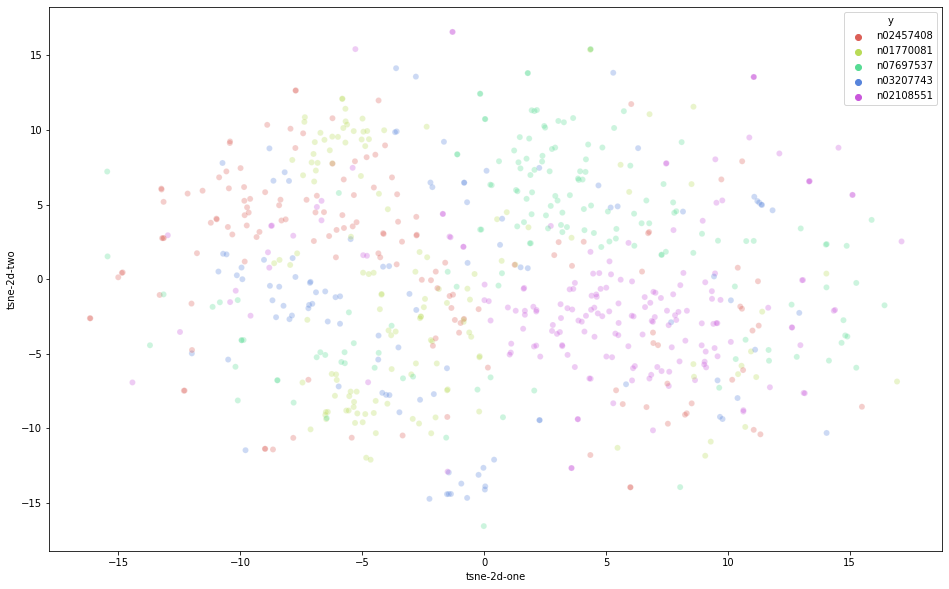

In [ ]:
Visualization.vizualize_tsne(train_Sub_X,train_Sub_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 555 samples in 0.001s...
[t-SNE] Computed neighbors for 555 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 555 / 555
[t-SNE] Mean sigma: 2.040831
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.341911
[t-SNE] KL divergence after 300 iterations: 1.244947
t-SNE done! Time elapsed: 1.8278391361236572 seconds


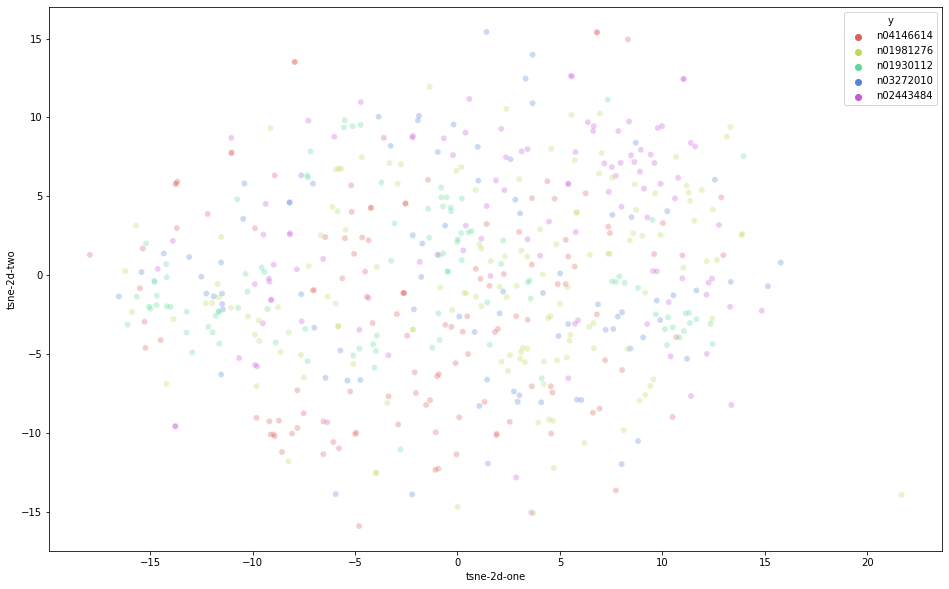

In [ ]:
Visualization.vizualize_tsne(test_Sub_X,test_Sub_Y)

## After training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 865 samples in 0.002s...
[t-SNE] Computed neighbors for 865 samples in 0.134s...
[t-SNE] Computed conditional probabilities for sample 865 / 865
[t-SNE] Mean sigma: 8.170898
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.983612
[t-SNE] KL divergence after 300 iterations: 1.754216
t-SNE done! Time elapsed: 3.301076650619507 seconds


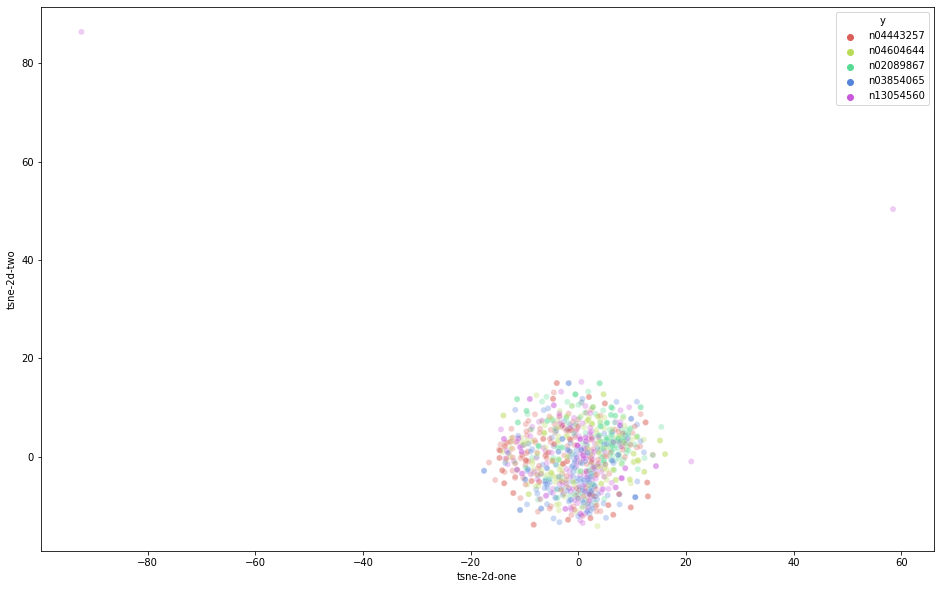

In [ ]:
Visualization.vizualize_tsne(train_Sub_X,train_Sub_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 660 samples in 0.003s...
[t-SNE] Computed neighbors for 660 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 660 / 660
[t-SNE] Mean sigma: 2.647591
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.612656
[t-SNE] KL divergence after 300 iterations: 1.983619
t-SNE done! Time elapsed: 2.2901980876922607 seconds


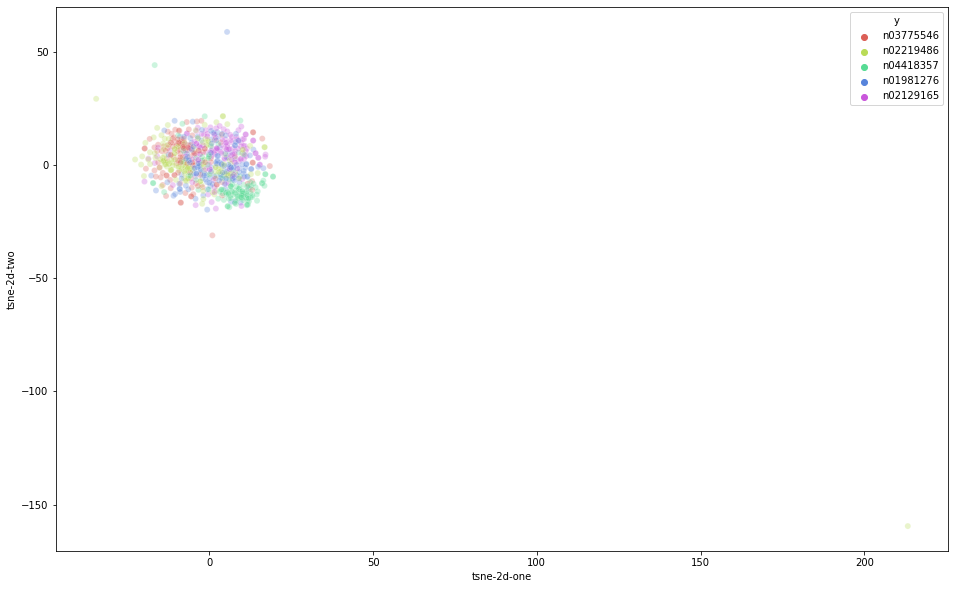

In [ ]:
Visualization.vizualize_tsne(test_Sub_X,test_Sub_Y)